We define the basic input data with noise

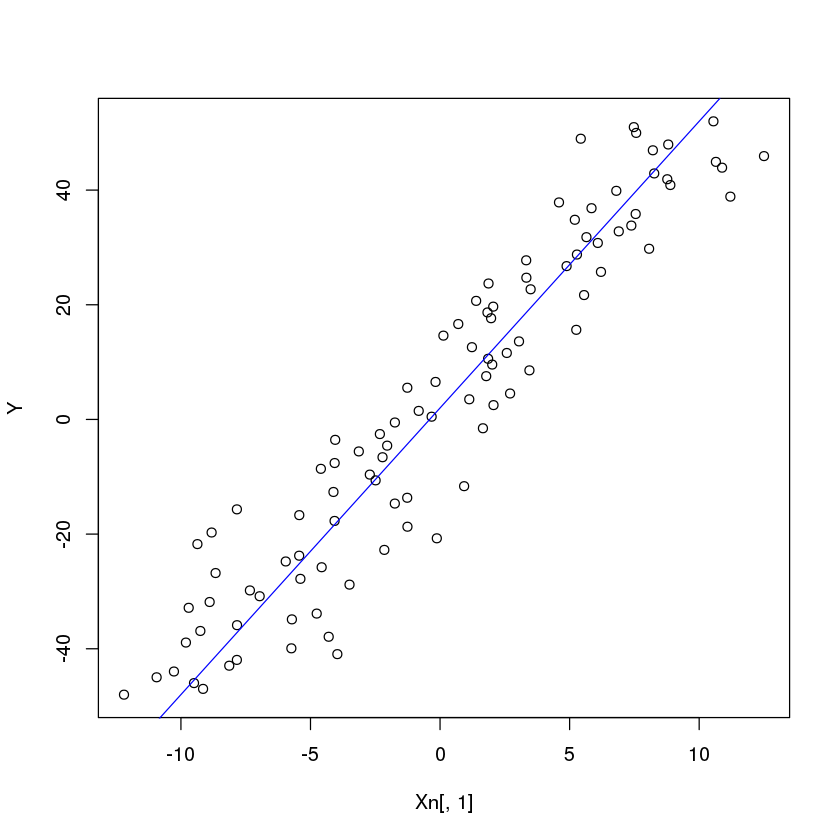

In [17]:
x <- seq(-10,10,length.out=100)
a <- 2
b <- 5
Y <- a+b*x
Xn <- x+cbind(rnorm(length(x),sd=2),rep(1,times=length(x)))

plot(Xn[,1],Y)
abline(c(a,b),col="blue")

We implement the Gradient descent method to calculate the parameters a and b

In [18]:
Theta <- matrix(c(1,1),nrow=2)

#Cost function
J <- function(X,Theta, Y){
  j <- 1/length(X)*( sum(X %*% Theta - Y)^2)
}

#Derivate of the cost function
dJ <- function(X,Theta, Y){
  dj <- 1/length(X)*t(X)%*%( X %*% Theta - Y)
}

maxIter <- 1000
alpha <- 0.01
err<-rep(0,maxIter)
for (i in 1:maxIter){
    Theta <- Theta - alpha*dJ(Xn,Theta,Y)
    err[i] <- J(Xn,Theta,Y)
}

an <- Theta[1]
bn <- Theta[2]

print(paste("Estimated value of a=",an,", b=",bn))

[1] "Estimated value of a= 0.614237488865548 , b= 4.32518417215818"


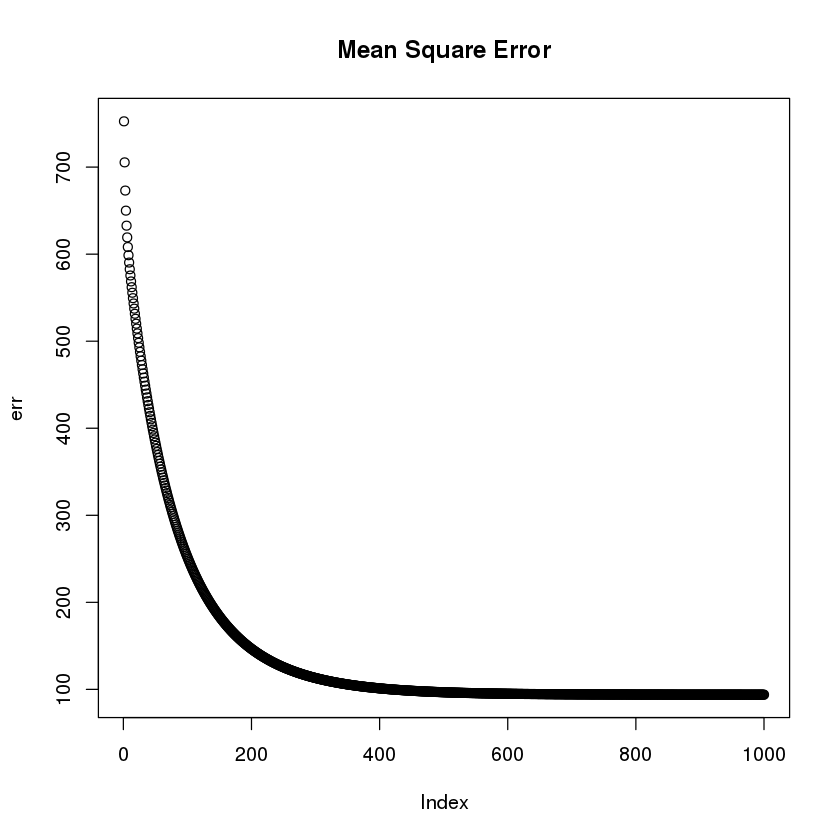

In [20]:
plot(err, main="Mean Square Error")

The approximation to our curve in red with the original curve in red:

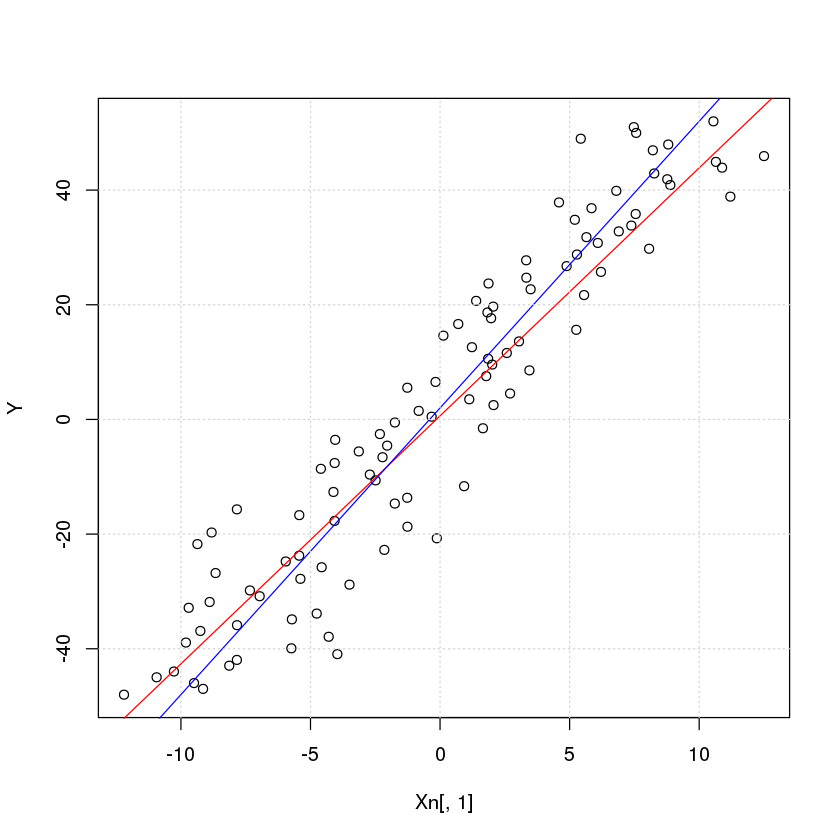

In [20]:
plot(Xn[,1], Y)
abline(Theta,col='red')
abline(c(a,b),col='blue')
grid()

In [ ]:
Another way to do this is using the Moore–Penrose pseudoinverse matrix

In [36]:
Theta<-solve(t(Xn) %*% Xn)%*%t(Xn)%*%Y
print(paste("Estimated value of a=",Theta[1],", b=",Theta[2]))

[1] "Estimated value of a= 0.614233014830346 , b= 4.32518880315233"


This pseudoinverse is included in the MASS R library as ginv(A)

In [38]:
library(MASS)
Theta<-ginv(Xn)%*%Y
print(paste("Estimated value of a=",Theta[1],", b=",Theta[2]))

[1] "Estimated value of a= 0.614233014830342 , b= 4.32518880315233"


But R also incorporates a function to calculate linear regression. This is the one which produces the better output

[1] "Estimated value of a= 2.40283864349388 , b= 4.51088771771247"


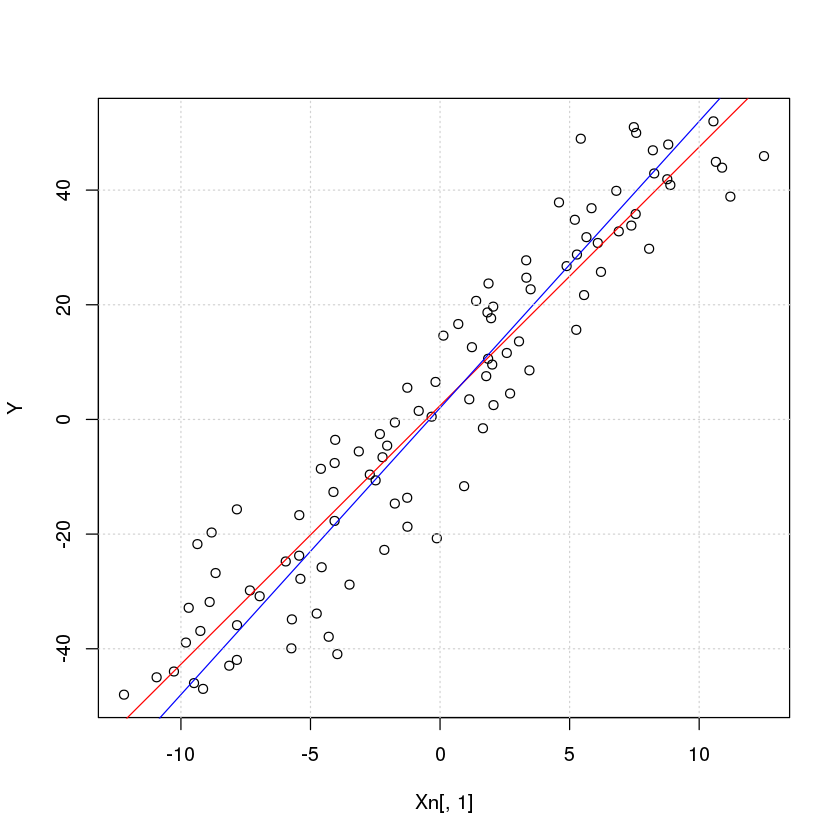

In [49]:
fit <- lm(Y ~ Xn[,1])
print(paste("Estimated value of a=",fit$coefficients[1],", b=",fit$coefficients[2]))

plot(Xn[,1], Y)
abline(fit,col='red')
abline(c(a,b),col='blue')
grid()